# Part 5 - Regression Model-Based Insights

## Loading the Data

In [1]:
%load_ext autoreload
%autoreload 2
import functions as pf

In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

##import statsmodels correctly
import statsmodels.api as sm

In [3]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',100)

###  Finding & Loading Batches of Files with glob

In [4]:
import os
FOLDER = 'Data/tmdb/'
file_list = sorted(os.listdir(FOLDER))
file_list

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz']

In [5]:
df = pd.read_csv(FOLDER+'combined_tmdb_api_data.csv.gz')
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.289,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,3.133,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8,NaN,2000.0
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",1.091,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.892,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.103,1948,PG,2000.0
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.913,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46,R,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,/8tyq1kXM3YQmu3obW6LxWm5TVRO.jpg,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",NaN,605153,tt9851854,te,మేజర్,Based on the life of real-life Hero Major Sand...,19.029,/sJOfJuyQVZPwNQ8g21Qv0lojQhC.jpg,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,149,"[{'english_name': 'Telugu', 'iso_639_1': 'te',...",Released,Jaan Doonga Desh Nahi,Major,False,8.233,15,NaN,2022.0
62380,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,0.600,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.000,0,NaN,2022.0
62381,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With his girlfriend pregnant, Dante, a pacifis...",3.136,/xppIANX9DQoRYg3FlNCifDYuFwP.jpg,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-03-13,0,96,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,False,8.000,1,NaN,2022.0
62382,False,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n..

## Preprocessing

In [6]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 'status',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

,adult,belongs_to_collection,budget,genres,imdb_id,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification,Release Year
0,False,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",2000-09-22,0,86,The Fantasticks,5.500,22,NaN,2000.0
1,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",tt0113092,3.133,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...",2000-11-15,0,100,For the Cause,5.100,8,NaN,2000.0
2,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",tt0116391,1.091,[],2000-04-14,0,152,Gang,0.000,0,NaN,2000.0
3,False,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt0118694,22.892,"[{'id': 539, 'logo_path': None, 'name': 'Block...",2000-09-29,12854953,99,In the Mood for Love,8.103,1948,PG,2000.0
4,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",tt0118852,3.913,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...",2000-09-02,0,99,Chinese Coffee,6.900,46,R,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",tt9851854,19.029,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...",2022-06-03,0,149,Major,8.233,15,NaN,2022.0
62380,False,NaN,0,"[{'id': 80, 'name': 'Crime'}]",tt9854058,0.600,[],2022-05-13,0,101,Shadows,0.000,0,NaN,2022.0
62381,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",tt9893158,3.136,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...",2022-03-13,0,96,Clowning,8.000,1,NaN,2022.0
62382,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",tt9893160,18.247,"[{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...",2022-08-12,0,89,No Way Out,3.000,3,NaN,2022.0


### Feature Engineering

* Collection: convert to boolean

* Genres: get just name and OHE

* Cleaning Certification

* Converting release date to year, month, and day.

In [7]:
df['belongs_to_collection'].notna().sum()

3980

In [8]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    58404
True      3980
Name: belongs_to_collection, dtype: int64

#### Genre

In [9]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [10]:
## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

,adult,belongs_to_collection,budget,genres,imdb_id,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification,Release Year,genres_list
0,False,False,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",2000-09-22,0,86,The Fantasticks,5.5,22,NaN,2000.0,Comedy
0,False,False,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",2000-09-22,0,86,The Fantasticks,5.5,22,NaN,2000.0,Music
0,False,False,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",2000-09-22,0,86,The Fantasticks,5.5,22,NaN,2000.0,Romance
1,False,False,0,"[{'id': 878, 'name': 'Science Fiction'}]",tt0113092,3.133,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...",2000-11-15,0,100,For the Cause,5.1,8,NaN,2000.0,Science Fiction
2,False,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",tt0116391,1.091,[],2000-04-14,0,152,Gang,0.0,0,NaN,2000.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62381,False,False,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",tt9893158,3.136,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...",2022-03-13,0,96,Clowning,8.0,1,NaN,2022.0,Romance
62382,False,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",tt9893160,18.247,"[{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...",2022-08-12,0,89,No Way Out,3.0,3,NaN,2022.0,Thriller
62382,False,False,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",tt9893160,18.247,"[{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...",2022-08-12,0,89,No Way Out,3.0,3,NaN,2022.0,Crime
62383,False,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt9904648,1.134,[],2022-01-18,0,82,The Contrast,3.0,1,NaN,2022.0,Comedy


In [11]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    

## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df

,adult,belongs_to_collection,budget,imdb_id,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification,Release Year,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,False,False,10000000,tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",2000-09-22,0,86,The Fantasticks,5.500,22,NaN,2000.0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,0,tt0113092,3.133,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...",2000-11-15,0,100,For the Cause,5.100,8,NaN,2000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,0,tt0116391,1.091,[],2000-04-14,0,152,Gang,0.000,0,NaN,2000.0,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,150000,tt0118694,22.892,"[{'id': 539, 'logo_path': None, 'name': 'Block...",2000-09-29,12854953,99,In the Mood for Love,8.103,1948,PG,2000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,0,tt0118852,3.913,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...",2000-09-02,0,99,Chinese Coffee,6.900,46,R,2000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,False,0,tt9851854,19.029,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...",2022-06-03,0,149,Major,8.233,15,NaN,2022.0,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False
62380,False,False,0,tt9854058,0.600,[],2022-05-13,0,101,Shadows,0.000,0,NaN,2022.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
62381,False,False,0,tt9893158,3.136,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...",2022-03-13,0,96,Clowning,8.000,1,NaN,2022.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
62382,False,False,0,tt9893160,18.247,"[{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...",2022-08-12,0,89,No Way Out,3.000,3,NaN,2022.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


#### Certification

In [12]:
## Checking Certification values
# df['certification'].value_counts(dropna=False)

# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      47245
R         6319
NR        3395
PG-13     3332
PG        1479
G          452
NC-17      162
Name: certification, dtype: int64

### Converting year to sep features

In [13]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
## drop original feature
df = df.drop(columns=['release_date'])
df

,adult,belongs_to_collection,budget,imdb_id,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,certification,Release Year,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,False,False,10000000,tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",0,86,The Fantasticks,5.500,22,NaN,2000.0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,False,False,0,tt0113092,3.133,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...",0,100,For the Cause,5.100,8,NaN,2000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,False,False,0,tt0116391,1.091,[],0,152,Gang,0.000,0,NaN,2000.0,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,False,False,150000,tt0118694,22.892,"[{'id': 539, 'logo_path': None, 'name': 'Block...",12854953,99,In the Mood for Love,8.103,1948,PG,2000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,False,False,0,tt0118852,3.913,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...",0,99,Chinese Coffee,6.900,46,R,2000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,False,0,tt9851854,19.029,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...",0,149,Major,8.233,15,NaN,2022.0,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2022.0,6.0,3.0
62380,False,False,0,tt9854058,0.600,[],0,101,Shadows,0.000,0,NaN,2022.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,5.0,13.0
62381,False,False,0,tt9893158,3.136,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...",0,96,Clowning,8.000,1,NaN,2022.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,3.0,13.0
62382,False,False,0,tt9893160,18.247,"[{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...",0,89,No Way Out,3.000,3,NaN,2022.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,2022.0,8.0,12.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62384 entries, 0 to 62383
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  62384 non-null  bool   
 1   belongs_to_collection  62384 non-null  bool   
 2   budget                 62384 non-null  int64  
 3   imdb_id                62384 non-null  object 
 4   popularity             62384 non-null  float64
 5   production_companies   62384 non-null  object 
 6   revenue                62384 non-null  int64  
 7   runtime                62384 non-null  int64  
 8   title                  62384 non-null  object 
 9   vote_average           62384 non-null  float64
 10  vote_count             62384 non-null  int64  
 11  certification          15139 non-null  object 
 12  Release Year           61262 non-null  float64
 13  Genre_Comedy           62384 non-null  bool   
 14  Genre_Music            62384 non-null  bool   
 15  Ge

## Train Test Split

In [15]:
drop_for_model = ['title','imdb_id','production_companies']
df = df.drop(columns=drop_for_model)
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Release Year,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,False,False,10000000,2.289,0,86,5.500,22,NaN,2000.0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,False,False,0,3.133,0,100,5.100,8,NaN,2000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,False,False,0,1.091,0,152,0.000,0,NaN,2000.0,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,False,False,150000,22.892,12854953,99,8.103,1948,PG,2000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,False,False,0,3.913,0,99,6.900,46,R,2000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,False,0,19.029,0,149,8.233,15,NaN,2022.0,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2022.0,6.0,3.0
62380,False,False,0,0.600,0,101,0.000,0,NaN,2022.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,5.0,13.0
62381,False,False,0,3.136,0,96,8.000,1,NaN,2022.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,3.0,13.0
62382,False,False,0,18.247,0,89,3.000,3,NaN,2022.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,2022.0,8.0,12.0


In [16]:
## Make x and y variables
y = df['revenue'].copy()
X = df.drop(columns=['revenue']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Release Year,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
32264,False,False,0,4.928,135,6.321,84,PG-13,2015.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2015.0,12.0,4.0
34839,False,False,0,0.600,79,8.000,1,NaN,2015.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2015.0,1.0,1.0
31036,False,False,0,0.600,89,7.000,1,R,2014.0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,2014.0,4.0,9.0
56568,False,False,0,1.504,110,7.000,6,NaN,2020.0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2020.0,3.0,19.0
28292,False,True,0,0.600,85,0.000,0,NaN,2013.0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,2013.0,1.0,30.0


In [17]:
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                      0
vote_average                 0
vote_count                   0
certification            35505
Release Year               837
Genre_Comedy                 0
Genre_Music                  0
Genre_Romance                0
Genre_Science Fiction        0
Genre_Drama                  0
Genre_Action                 0
Genre_Crime                  0
Genre_Adventure              0
Genre_Animation              0
Genre_Fantasy                0
Genre_Horror                 0
Genre_Thriller               0
Genre_History                0
Genre_Family                 0
Genre_Mystery                0
Genre_Western                0
Genre_War                    0
Genre_TV Movie               0
Genre_Documentary            0
year                       837
month                      837
day                        837
dtype: int64

In [18]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [19]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'Release Year',
 'year',
 'month',
 'day']

In [20]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['adult',
 'belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [21]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)
X_train

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Release Year,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
32264,0,0,0,4.928,135,6.321,84,PG-13,2015.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015.0,12.0,4.0
34839,0,0,0,0.600,79,8.000,1,NaN,2015.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015.0,1.0,1.0
31036,0,0,0,0.600,89,7.000,1,R,2014.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2014.0,4.0,9.0
56568,0,0,0,1.504,110,7.000,6,NaN,2020.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2020.0,3.0,19.0
28292,0,1,0,0.600,85,0.000,0,NaN,2013.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2013.0,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,0,0,0,1.082,85,5.400,21,NaN,2004.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004.0,8.0,4.0
43807,0,0,0,0.600,70,0.000,0,NaN,2017.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2017.0,11.0,10.0
4220,0,0,0,2.842,97,3.600,21,NaN,2003.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2003.0,2.0,23.0
6682,0,1,25000000,10.564,99,4.157,413,R,2005.0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,2005.0,10.0,22.0


In [22]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
                                       remainder='passthrough',
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count', 'Release Year',
                                  'year', 'month', 'day']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification'])],
                  verbose_feature_names_out=False)

In [23]:
## fit the col transformer
preprocessor.fit(X_train)

X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)

X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=preprocessor.get_feature_names_out(), index=X_test.index)
display(X_train_tf.head(3), X_test_tf.head(3))

,budget,popularity,runtime,vote_average,vote_count,Release Year,year,month,day,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
32264,0.0,4.928,135.0,6.321,84.0,2015.0,2015.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34839,0.0,0.600,79.0,8.000,1.0,2015.0,2015.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31036,0.0,0.600,89.0,7.000,1.0,2014.0,2014.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,budget,popularity,runtime,vote_average,vote_count,Release Year,year,month,day,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
9967,30000000.0,10.117,102.0,6.361,447.0,2007.0,2007.0,4.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59384,0.0,1.076,139.0,7.200,2.0,2021.0,2021.0,11.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59955,175000.0,0.600,108.0,0.000,0.0,2015.0,2015.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
## fit the col transformer
preprocessor.fit(X_train)
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)
X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                          columns=preprocessor.get_feature_names_out(),
                          index=X_test.index)
X_train_tf.head()

,budget,popularity,runtime,vote_average,vote_count,Release Year,year,month,day,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
32264,0.0,4.928,135.0,6.321,84.0,2015.0,2015.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34839,0.0,0.600,79.0,8.000,1.0,2015.0,2015.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31036,0.0,0.600,89.0,7.000,1.0,2014.0,2014.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56568,0.0,1.504,110.0,7.000,6.0,2020.0,2020.0,3.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28292,0.0,0.600,85.0,0.000,0.0,2013.0,2013.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Adding a Constant for Statsmodels

In [25]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2),X_test_df.head(2))

,budget,popularity,runtime,vote_average,vote_count,Release Year,year,month,day,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
32264,0.0,4.928,135.0,6.321,84.0,2015.0,2015.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34839,0.0,0.600,79.0,8.000,1.0,2015.0,2015.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,budget,popularity,runtime,vote_average,vote_count,Release Year,year,month,day,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
9967,30000000.0,10.117,102.0,6.361,447.0,2007.0,2007.0,4.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59384,0.0,1.076,139.0,7.200,2.0,2021.0,2021.0,11.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Linear Regression

### Modeling - Baseline Model

In [26]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     4035.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:53:55   Log-Likelihood:            -8.7166e+05
No. Observations:               46788   AIC:                         1.743e+06
Df Residuals:                   46752   BIC:                         1.744e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
budget                    1.5718      0.013    122.373      0.000       1.547       1.597
popularity             3.971e+04   2031.734     19.546      0.000    3.57e+04    4.37e+04
runtime               -6464.6656   4731.061     -1.366      0.172   -1.57e+04    2808.284
vote_average           -4.29e+05   5.72e+04     -7.506      0.000   -5.41e+05   -3.17e+05
vote_count             2.787e+04    183.053    152.255      0.000    2.75e+04    2.82e+04
Release Year           2.605e+04   1.21e+04      2.145      0.032    2252.111    4.99e+04
year                   2.605e+04   1.21e+04      2.145      0.032    2252.109    4.99e+04
month                 -8.746e+04   3.96e+04     -2.208      0.027   -1.65e+05   -9827.672
day                   -1221.7591   1.53e+04     -0.080      0.936   -3.12e+04    2.87e+04
certification_G       -1.221e+07   6.29e+06     -1.942      0.052   -2.45e+07    1.16e+05
certification_MISSING -9.264e+06   6.15e+06     -1.506      0.132   -2.13e+07     2.8e+06
certification_NC-17   -1.279e+07   6.58e+06     -1.943      0.052   -2.57e+07    1.11e+05
certification_NR      -1.017e+07   6.18e+06     -1.646      0.100   -2.23e+07    1.94e+06
certification_PG      -7.979e+06   6.17e+06     -1.294      0.196   -2.01e+07     4.1e+06
certification_PG-13   -1.829e+07   6.13e+06     -2.983      0.003   -3.03e+07   -6.27e+06
certification_R        -2.26e+07    6.1e+06     -3.703      0.000   -3.46e+07   -1.06e+07
adult                  1.632e+06   3.43e+06      0.476      0.634   -5.09e+06    8.36e+06
belongs_to_collection  1.125e+07   6.09e+05     18.478      0.000    1.01e+07    1.24e+07
Genre_Comedy           6.719e+04    3.4e+05      0.198      0.843   -5.98e+05    7.33e+05
Genre_Music            1.274e+06   9.98e+05      1.277      0.202   -6.82e+05    3.23e+06
Genre_Romance          1.282e+05   4.27e+05      0.300      0.764    -7.1e+05    9.66e+05
Genre_Science Fiction -4.744e+06   6.33e+05     -7.489      0.000   -5.98e+06    -3.5e+06
Genre_Drama           -1.859e+05   3.18e+05     -0.585      0.558   -8.08e+05    4.37e+05
Genre_Action          -1.811e+06   4.71e+05     -3.844      0.000   -2.73e+06   -8.88e+05
Genre_Crime           -2.734e+06   5.47e+05     -4.997      0.000   -3.81e+06   -1.66e+06
Genre_Adventure        3.145e+06   7.01e+05      4.489      0.000    1.77e+06    4.52e+06
Genre_Animation        3.891e+06   8.61e+05      4.519      0.000     2.2e+06    5.58e+06
Genre_Fantasy         -1.129e+06   6.95e+05     -1.625      0.104   -2.49e+06    2.33e+05
Genre_Horror            3.96e+05   4.32e+05      0.918      0.359    -4.5e+05    1.24e+06
Genre_Thriller        -1.161e+06   4.02e+05     -2.890      0.004   -1.95e+06   -3.74e+05
Genre_History         -3.336e+06   9.48e+05     -3.520      0.000   -5.19e+06   -1.48e+06
Genre_Family          -

In [27]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.751
Testing R^2: 0.740


#### The Assumptions of Linear Regression

* The 4 Assumptions of a Linear Regression are:
    * **Linearity**: That the input features have a linear relationship with the target.
    
    * **Independence of features (AKA Little-to-No Multicollinearity)**: That the features are not strongly related to other features.
    
    * **Normality**: The model's residuals are approximately normally distributed.
    
    * **Homoscedasticity**: The model residuals have equal variance across all predictions.

### Diagnosing Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     4035.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:53:55   Log-Likelihood:            -8.7166e+05
No. Observations:               46788   AIC:                         1.743e+06
Df Residuals:                   46752   BIC:                         1.744e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
budget                    1.5718      0.013    122.373      0.000       1.547       1.597
popularity             3.971e+04   2031.734     19.546      0.000    3.57e+04    4.37e+04
runtime               -6464.6656   4731.061     -1.366      0.172   -1.57e+04    2808.284
vote_average           -4.29e+05   5.72e+04     -7.506      0.000   -5.41e+05   -3.17e+05
vote_count             2.787e+04    183.053    152.255      0.000    2.75e+04    2.82e+04
Release Year           2.605e+04   1.21e+04      2.145      0.032    2252.111    4.99e+04
year                   2.605e+04   1.21e+04      2.145      0.032    2252.109    4.99e+04
month                 -8.746e+04   3.96e+04     -2.208      0.027   -1.65e+05   -9827.672
day                   -1221.7591   1.53e+04     -0.080      0.936   -3.12e+04    2.87e+04
certification_G       -1.221e+07   6.29e+06     -1.942      0.052   -2.45e+07    1.16e+05
certification_MISSING -9.264e+06   6.15e+06     -1.506      0.132   -2.13e+07     2.8e+06
certification_NC-17   -1.279e+07   6.58e+06     -1.943      0.052   -2.57e+07    1.11e+05
certification_NR      -1.017e+07   6.18e+06     -1.646      0.100   -2.23e+07    1.94e+06
certification_PG      -7.979e+06   6.17e+06     -1.294      0.196   -2.01e+07     4.1e+06
certification_PG-13   -1.829e+07   6.13e+06     -2.983      0.003   -3.03e+07   -6.27e+06
certification_R        -2.26e+07    6.1e+06     -3.703      0.000   -3.46e+07   -1.06e+07
adult                  1.632e+06   3.43e+06      0.476      0.634   -5.09e+06    8.36e+06
belongs_to_collection  1.125e+07   6.09e+05     18.478      0.000    1.01e+07    1.24e+07
Genre_Comedy           6.719e+04    3.4e+05      0.198      0.843   -5.98e+05    7.33e+05
Genre_Music            1.274e+06   9.98e+05      1.277      0.202   -6.82e+05    3.23e+06
Genre_Romance          1.282e+05   4.27e+05      0.300      0.764    -7.1e+05    9.66e+05
Genre_Science Fiction -4.744e+06   6.33e+05     -7.489      0.000   -5.98e+06    -3.5e+06
Genre_Drama           -1.859e+05   3.18e+05     -0.585      0.558   -8.08e+05    4.37e+05
Genre_Action          -1.811e+06   4.71e+05     -3.844      0.000   -2.73e+06   -8.88e+05
Genre_Crime           -2.734e+06   5.47e+05     -4.997      0.000   -3.81e+06   -1.66e+06
Genre_Adventure        3.145e+06   7.01e+05      4.489      0.000    1.77e+06    4.52e+06
Genre_Animation        3.891e+06   8.61e+05      4.519      0.000     2.2e+06    5.58e+06
Genre_Fantasy         -1.129e+06   6.95e+05     -1.625      0.104   -2.49e+06    2.33e+05
Genre_Horror            3.96e+05   4.32e+05      0.918      0.359    -4.5e+05    1.24e+06
Genre_Thriller        -1.161e+06   4.02e+05     -2.890      0.004   -1.95e+06   -3.74e+05
Genre_History         -3.336e+06   9.48e+05     -3.520      0.000   -5.19e+06   -1.48e+06
Genre_Family          -

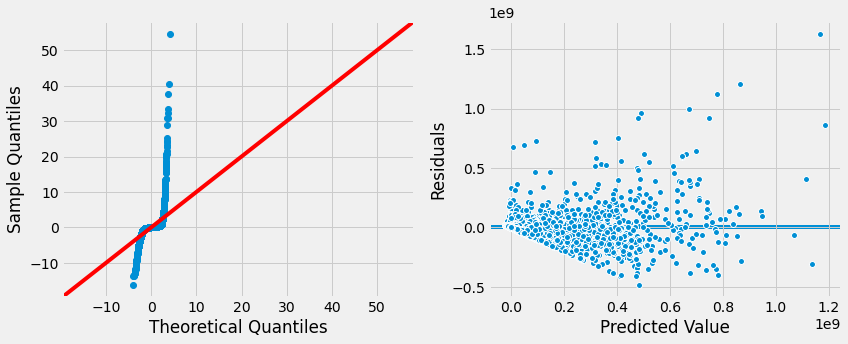

In [28]:
pf.evaluate_ols(result,X_train_df, y_train)

## Improving Our Model:


> We should probably remove movies with 0 budget and revenue.

In [29]:
## reload the data
df = pd.read_csv(FOLDER+'combined_tmdb_api_data.csv.gz',lineterminator='\n')
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year\r
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.289,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22,NaN,2000.0\r
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,3.133,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8,NaN,2000.0\r
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",1.091,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0,NaN,2000.0\r
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.892,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.103,1948,PG,2000.0\r
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.913,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46,R,2000.0\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,/8tyq1kXM3YQmu3obW6LxWm5TVRO.jpg,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",NaN,605153,tt9851854,te,మేజర్,Based on the life of real-life Hero Major Sand...,19.029,/sJOfJuyQVZPwNQ8g21Qv0lojQhC.jpg,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,149,"[{'english_name': 'Telugu', 'iso_639_1': 'te',...",Released,Jaan Doonga Desh Nahi,Major,False,8.233,15,NaN,2022.0\r
62380,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,0.600,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.000,0,NaN,2022.0\r
62381,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With his girlfriend pregnant, Dante, a pacifis...",3.136,/xppIANX9DQoRYg3FlNCifDYuFwP.jpg,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-03-13,0,96,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,False,8.000,1,NaN,2022.0\r
62382,False,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,NaN,0,"[{'id': 53, 'name': 'Thriller'

In [30]:
## Repeating Feature Engineering
## Columns to exclude - Keeping Status and companies
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', #'status','production_companies'
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)

## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()

## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')

## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    


## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])


#### Fixing Certification
## Checking Certification values
df['certification'].value_counts(dropna=False)
# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)


#### Converting year to sep features
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)

## drop original feature
df = df.drop(columns=['release_date'])
df

,adult,belongs_to_collection,budget,imdb_id,popularity,production_companies,revenue,runtime,status,title,vote_average,vote_count,certification,Release Year\r,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,False,False,10000000,tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",0,86,Released,The Fantasticks,5.500,22,NaN,2000.0\r,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,False,False,0,tt0113092,3.133,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...",0,100,Released,For the Cause,5.100,8,NaN,2000.0\r,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,False,False,0,tt0116391,1.091,[],0,152,Released,Gang,0.000,0,NaN,2000.0\r,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,False,False,150000,tt0118694,22.892,"[{'id': 539, 'logo_path': None, 'name': 'Block...",12854953,99,Released,In the Mood for Love,8.103,1948,PG,2000.0\r,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,False,False,0,tt0118852,3.913,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...",0,99,Released,Chinese Coffee,6.900,46,R,2000.0\r,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,False,0,tt9851854,19.029,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...",0,149,Released,Major,8.233,15,NaN,2022.0\r,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2022.0,6.0,3.0
62380,False,False,0,tt9854058,0.600,[],0,101,Released,Shadows,0.000,0,NaN,2022.0\r,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,5.0,13.0
62381,False,False,0,tt9893158,3.136,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...",0,96,Released,Clowning,8.000,1,NaN,2022.0\r,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,3.0,13.0
62382,False,False,0,tt9893160,18.247,"[{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...",0,89,Released,No Way Out,3.000,3,NaN,2022.0\r,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,2022.0,8.0,12.0


In [31]:
## Check status
df['status'].value_counts()

Released           62206
Post Production      126
In Production         46
Planned                6
Name: status, dtype: int64

In [32]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

,adult,belongs_to_collection,budget,imdb_id,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,certification,Release Year\r,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,False,False,10000000,tt0113026,2.289,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...",0,86,The Fantasticks,5.500,22,NaN,2000.0\r,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,False,False,0,tt0113092,3.133,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...",0,100,For the Cause,5.100,8,NaN,2000.0\r,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,False,False,0,tt0116391,1.091,[],0,152,Gang,0.000,0,NaN,2000.0\r,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,False,False,150000,tt0118694,22.892,"[{'id': 539, 'logo_path': None, 'name': 'Block...",12854953,99,In the Mood for Love,8.103,1948,PG,2000.0\r,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,False,False,0,tt0118852,3.913,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...",0,99,Chinese Coffee,6.900,46,R,2000.0\r,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62379,False,False,0,tt9851854,19.029,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...",0,149,Major,8.233,15,NaN,2022.0\r,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2022.0,6.0,3.0
62380,False,False,0,tt9854058,0.600,[],0,101,Shadows,0.000,0,NaN,2022.0\r,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,5.0,13.0
62381,False,False,0,tt9893158,3.136,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...",0,96,Clowning,8.000,1,NaN,2022.0\r,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2022.0,3.0,13.0
62382,False,False,0,tt9893160,18.247,"[{'id': 13238, 'logo_path': '/kDNZz8imH866Mezx...",0,89,No Way Out,3.000,3,NaN,2022.0\r,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,2022.0,8.0,12.0


In [33]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

,adult,belongs_to_collection,budget,imdb_id,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,certification,Release Year\r,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,False,False,150000,tt0118694,22.892,"[{'id': 539, 'logo_path': None, 'name': 'Block...",12854953,99,In the Mood for Love,8.103,1948,PG,2000.0\r,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,False,False,120000,tt0120467,3.636,"[{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...",14904,87,Vulgar,5.400,42,R,2002.0\r,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,False,True,45000000,tt0120630,51.497,"[{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...",224834564,84,Chicken Run,6.725,4101,G,2000.0\r,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,21.0
15,False,False,8000000,tt0120753,8.389,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...",105983,122,The Million Dollar Hotel,5.915,254,R,2000.0\r,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,False,True,125000000,tt0120755,37.180,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...",546388105,123,Mission: Impossible II,6.107,5441,PG-13,2000.0\r,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62316,False,False,90000000,tt8912936,614.916,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",130000000,105,DC League of Super-Pets,7.200,109,PG,2022.0\r,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,2022.0,7.0,27.0
62343,False,True,15354648,tt9179430,13.324,"[{'id': 7202, 'logo_path': '/tanmRcGlEgtAZhdcU...",29646564,174,Vikram,6.781,32,NaN,2022.0\r,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,2022.0,6.0,2.0
62345,False,False,120000,tt9193690,1.261,"[{'id': 17259, 'logo_path': None, 'name': 'Ser...",500000,87,Seize the Night,5.000,1,NaN,2022.0\r,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2022.0,2.0,14.0
62350,False,False,7900000,tt9263550,10.280,"[{'id': 88275, 'logo_path': None, 'name': 'Tri...",3900000,154,Rocketry: The Nambi Effect,7.692,13,NaN,2022.0\r,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2022.0,7.0,1.0


## Production Company

In [34]:
df['production_companies']

3        [{'id': 539, 'logo_path': None, 'name': 'Block...
10       [{'id': 16934, 'logo_path': '/7HEUbdTlFQWf4SKi...
12       [{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...
15       [{'id': 1490, 'logo_path': None, 'name': 'Kint...
16       [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...
                               ...                        
62316    [{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...
62343    [{'id': 7202, 'logo_path': '/tanmRcGlEgtAZhdcU...
62345    [{'id': 17259, 'logo_path': None, 'name': 'Ser...
62350    [{'id': 88275, 'logo_path': None, 'name': 'Tri...
62361    [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...
Name: production_companies, Length: 5211, dtype: object

In [35]:
## getting longest string to check for multiple companies
idxmax = df['production_companies'].apply(len).idxmax()
idxmax 

143

In [36]:
test = df.loc[idxmax, 'production_companies']
test

"[{'id': 8, 'logo_path': '/78ilmDNTpdCfsakrsLqmAUkFTrO.png', 'name': 'Fine Line Features', 'origin_country': ''}, {'id': 46, 'logo_path': '/3xFdKHLXPGHEbrAkmsepGE8974Y.png', 'name': 'WDR', 'origin_country': 'DE'}, {'id': 47, 'logo_path': '/i7Z9ot2o3N5Sa3HrF09kniFs2y8.png', 'name': 'Constantin Film', 'origin_country': 'DE'}, {'id': 76, 'logo_path': '/nebkQYtQKhZyHJfh5v0oGpNbPzu.png', 'name': 'Zentropa Entertainments', 'origin_country': 'DK'}, {'id': 94, 'logo_path': '/huC7HqorvUThGIrENrbcHmQVUA0.png', 'name': 'ARTE France Cinéma', 'origin_country': 'FR'}, {'id': 104, 'logo_path': '/9aotxauvc9685tq9pTcRJszuT06.png', 'name': 'Canal+', 'origin_country': 'FR'}, {'id': 119, 'logo_path': '/1di2gITGUZr730AMuMKiCrP90Vl.png', 'name': 'DR', 'origin_country': 'DK'}, {'id': 157, 'logo_path': None, 'name': 'SVT Drama', 'origin_country': ''}, {'id': 201, 'logo_path': '/6UIpEURdjnmcJPwgTDRzVRuwADr.png', 'name': 'ARTE', 'origin_country': 'FR'}, {'id': 321, 'logo_path': '/pfp6VWF3tYfOHHVRHpYe2iGcYrf.png

In [37]:
# using regular expressions to extrap just the name
import re
exp= r"\'name\'\:.?\'(\w*.*?)\'"
re.findall(exp, test)

['Fine Line Features',
 'WDR',
 'Constantin Film',
 'Zentropa Entertainments',
 'ARTE France Cinéma',
 'Canal+',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'TV 1000 Sverige',
 'France 3 Cinéma',
 'Film i Väst',
 'Angel films',
 'YLE',
 'Film4 Productions',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 'Íslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Lantia Cinema & Audiovisivi']

In [38]:
def get_prod_company_names(x):
    if x=='[]':
        return ["MISSING"]
    
    exp= r"\'name\'\:.?\'(\w*.*?)\'"
    companies = re.findall(exp, x)
    return companies

In [39]:
## test function
get_prod_company_names(test)

['Fine Line Features',
 'WDR',
 'Constantin Film',
 'Zentropa Entertainments',
 'ARTE France Cinéma',
 'Canal+',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'TV 1000 Sverige',
 'France 3 Cinéma',
 'Film i Väst',
 'Angel films',
 'YLE',
 'Film4 Productions',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 'Íslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Lantia Cinema & Audiovisivi']

In [40]:
## Save new clean prod_comapny col and explode
df['prod_company'] = df['production_companies'].apply(get_prod_company_names)
prod_companies = df['prod_company'].explode()
prod_companies.value_counts().head(49)

C:\Users\nbeac\AppData\Local\Temp\ipykernel_4564\4230646071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_company'] = df['production_companies'].apply(get_prod_company_names)


Universal Pictures           297
Warner Bros. Pictures        282
Columbia Pictures            238
20th Century Fox             197
Paramount                    180
MISSING                      168
Canal+                       157
New Line Cinema              146
Walt Disney Pictures         136
Lionsgate                    125
Relativity Media             123
DreamWorks Pictures           99
Metro-Goldwyn-Mayer           99
StudioCanal                   97
Village Roadshow Pictures     91
Touchstone Pictures           78
Miramax                       75
Summit Entertainment          73
Dune Entertainment            69
Screen Gems                   68
Focus Features                67
Fox Searchlight Pictures      64
Regency Enterprises           62
Sony Pictures                 60
Blumhouse Productions         59
Working Title Films           58
Dimension Films               55
TSG Entertainment             54
Ciné+                         52
The Weinstein Company         51
Film4 Prod

In [41]:
prod_companies.nunique()

6512

In [42]:
## saving the 50 most common companies
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['20th Century Fox',
 'BBC Films',
 'Blumhouse Productions',
 'CJ Entertainment',
 'CNC',
 'Canal+',
 'Ciné+',
 'Columbia Pictures',
 'Dimension Films',
 'DreamWorks Animation',
 'DreamWorks Pictures',
 'Dune Entertainment',
 'Epsilon Motion Pictures',
 'EuropaCorp',
 'Film4 Productions',
 'FilmNation Entertainment',
 'Focus Features',
 'Fox 2000 Pictures',
 'Fox Searchlight Pictures',
 'France 2 Cinéma',
 'France 3 Cinéma',
 'Ingenious Media',
 'Legendary Pictures',
 'Lionsgate',
 'MISSING',
 'Metro-Goldwyn-Mayer',
 'Millennium Films',
 'Miramax',
 'New Line Cinema',
 'New Regency Pictures',
 'Original Film',
 'Paramount',
 'Regency Enterprises',
 'Relativity Media',
 'Revolution Studios',
 'Scott Free Productions',
 'Scott Rudin Productions',
 'Screen Gems',
 'Sony Pictures',
 'StudioCanal',
 'Summit Entertainment',
 'TF1 Films Production',
 'TSG Entertainment',
 'The Weinstein Company',
 'Touchstone Pictures',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disney Pictur

In [43]:
## manually ohe top 20 companies
for company in common_companies:
    df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)

C:\Users\nbeac\AppData\Local\Temp\ipykernel_4564\197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
C:\Users\nbeac\AppData\Local\Temp\ipykernel_4564\197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
C:\Users\nbeac\AppData\Local\Temp\ipykernel_4564\197917080.py:3: SettingWithCopyWarning: 
A value is trying to

C:\Users\nbeac\AppData\Local\Temp\ipykernel_4564\197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
C:\Users\nbeac\AppData\Local\Temp\ipykernel_4564\197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
C:\Users\nbeac\AppData\Local\Temp\ipykernel_4564\197917080.py:3: SettingWithCopyWarning: 
A value is trying to

## Checking for Linearity

In [44]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

,budget,popularity,runtime,vote_average,vote_count,Release Year,year,month,day,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const,revenue
32264,0.0,4.928,135.0,6.321,84.0,2015.0,2015.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
34839,0.0,0.600,79.0,8.000,1.0,2015.0,2015.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
31036,0.0,0.600,89.0,7.000,1.0,2014.0,2014.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200340
56568,0.0,1.504,110.0,7.000,6.0,2020.0,2020.0,3.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
28292,0.0,0.600,85.0,0.000,0.0,2013.0,2013.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,0.0,1.082,85.0,5.400,21.0,2004.0,2004.0,8.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
43807,0.0,0.600,70.0,0.000,0.0,2017.0,2017.0,11.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4220,0.0,2.842,97.0,3.600,21.0,2003.0,2003.0,2.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6682,25000000.0,10.564,99.0,4.157,413.0,2005.0,2005.0,10.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3650275


In [45]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in plot_df if c.startswith('Genre')]
comp_cols = [c for c in plot_df if c.startswith('ProdComp')]

plot_cols = plot_df.drop(columns=[*genre_cols, *comp_cols]).columns
plot_cols

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'Release Year', 'year', 'month', 'day', 'certification_G',
       'certification_MISSING', 'certification_NC-17', 'certification_NR',
       'certification_PG', 'certification_PG-13', 'certification_R', 'adult',
       'belongs_to_collection', 'const', 'revenue'],
      dtype='object')

In [46]:
len(plot_cols)

20

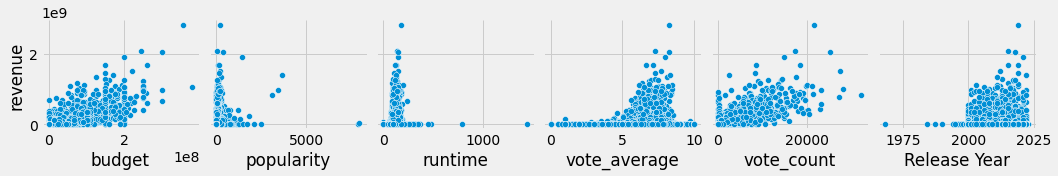

In [47]:
## Plot first 6 features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[:6])

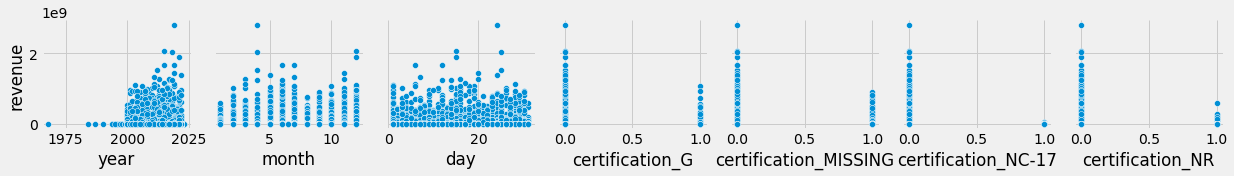

In [48]:

## Plot next 6 features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[6:13])

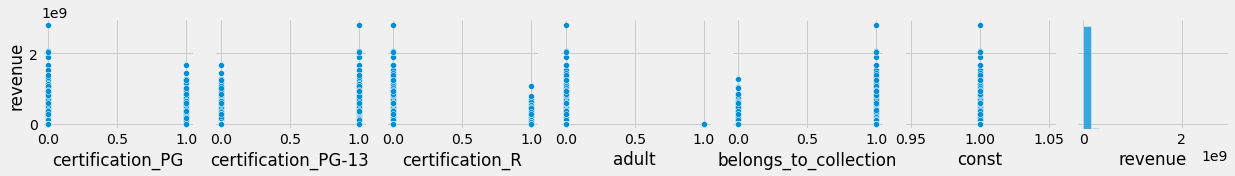

In [49]:
## plot remaining features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[13:])

In [ ]:
# remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

In [ ]:
## plot remaining features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[13:])